COLLEGE ADMISSION PREDCITION MODEL


In [8]:
import pandas as pd
df = pd.read_csv("Admission_Predict.csv")

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.info()
print(df.duplicated().sum()) #to see duplicate row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
0


In [11]:
df= df.drop(columns=['Serial No.'])

In [17]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [19]:
#Scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [20]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [23]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1,activation='linear')) #regression problem so linear

c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
history=model.fit(X_train_scaled, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7520 - val_loss: 2.7657
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3006 - val_loss: 2.4224
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.0705 - val_loss: 2.1132
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8006 - val_loss: 1.8394
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6094 - val_loss: 1.5978
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3288 - val_loss: 1.3862
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.1450 - val_loss: 1.1966
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0296 - val_loss: 1.0314
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8665 - val_loss: 0.8860
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7737 - val_loss: 0.7586
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6612 - val_loss: 0.6477
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5

In [30]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [33]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

-7.075900504307999

very bad accuracy
increasing the accuracy thus improved model

In [34]:
model1 = Sequential()

model1.add(Dense(7, activation='relu', input_dim=7))
model1.add(Dense(7, activation='relu'))
model1.add(Dense(1,activation='linear')) #regression problem so linear

c:\Users\ggaur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model1.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
history=model1.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - loss: 0.1285 - val_loss: 0.0922
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0811 - val_loss: 0.0554
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0451 - val_loss: 0.0430
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0380 - val_loss: 0.0400
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0363 - val_loss: 0.0366
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0333 - val_loss: 0.0328
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0270 - val_loss: 0.0294
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0242 - val_loss: 0.0260
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223 - val_loss: 0.0226
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0207 - val_loss: 0.0196
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0179 - val_loss: 0.0172
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

In [41]:
y_pred1=model1.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [42]:
from sklearn.metrics import r2_score
accuracy1= r2_score(y_test,y_pred1)
accuracy1

0.7812409420651014

In [43]:
import matplotlib.pyplot as myplt

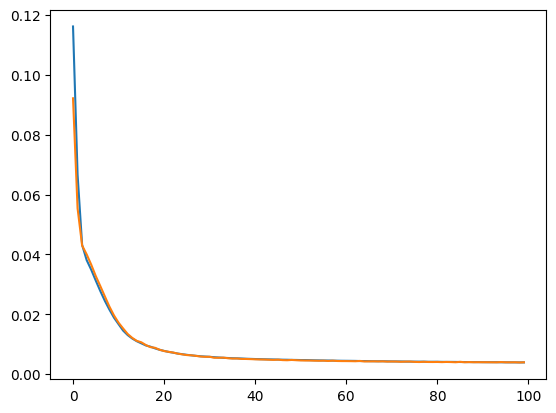

In [46]:
myplt.plot(history.history['loss'])
myplt.plot(history.history['val_loss'])